# Navigation

---


### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 2.0.10 which is incompatible.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import torch
from agent import Agent
from collections import deque
from unityagents import UnityEnvironment

%matplotlib inline

# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, we use the Python API to control the agent and receive feedback from the environment by selecting an action randomly at each time step. A window should pop up that allows you to observe the agent, as it moves through the environment.

In [5]:
env_info = env.reset(train_mode=True)[brain_name]  # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


### 4. Train the agents

The DQN can be trained by calling the dqn function. Both agent and model classes are invoked from their respective helper files.

**Note**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [6]:
def dqn(n_episodes=2000, max_t=2000, eps_start=1.0, eps_end=0.01, eps_decay=0.995, 
        checkpoint_path='checkpoint.pth'):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]  # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0                                          # initialize the score
        for t in range(max_t):
            action = agent.act(state, eps)                 # select an action
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done) # learning step
            score += reward                                # update the score
            state = next_state                             # roll over the state to next time step
            if done:                                       # exit loop if episode finished
                break
        
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'
                  .format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), checkpoint_path)
            break 
            
    return scores

### Hyperparemeters

The following hyperparameters were used for the different models:

    - BUFFER_SIZE = int(1e5)    replay buffer size
    - BATCH_SIZE = 64           minibatch size
    - GAMMA = 0.99              discount factor
    - TAU = 1e-3                for soft update of target parameters
    - LR = 5e-4                 learning rate 
    - UPDATE_EVERY = 4          how often to update the network

### DQN

Episode 100	Average Score: 0.59
Episode 200	Average Score: 3.84
Episode 300	Average Score: 5.94
Episode 400	Average Score: 7.88
Episode 500	Average Score: 11.70
Episode 548	Average Score: 13.00
Environment solved in 448 episodes!	Average Score: 13.00


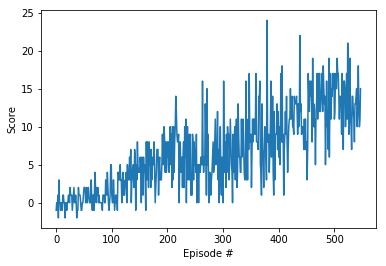

In [7]:
# initialize the agent
agent = Agent(state_size=37, action_size=4, seed=0, fc1_units=32, 
              fc2_units=32, fc3_units=32, dueling=False, double_network=False)

# train the agent
scores = dqn(checkpoint_path='dqn.pth')

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### Dueling DQN

Episode 100	Average Score: 0.62
Episode 200	Average Score: 2.96
Episode 300	Average Score: 6.94
Episode 400	Average Score: 10.67
Episode 500	Average Score: 12.38
Episode 522	Average Score: 13.10
Environment solved in 422 episodes!	Average Score: 13.10


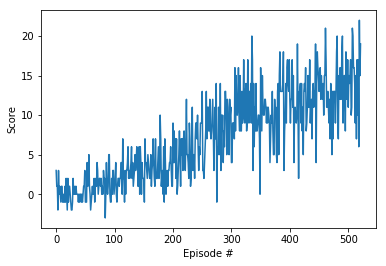

In [8]:
# initialize the agent
agent = Agent(state_size=37, action_size=4, seed=0, fc1_units=32, 
              fc2_units=32, fc3_units=32, dueling=True, double_network=False)

# train the agent
scores = dqn(checkpoint_path='dqn_dueling.pth')

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### Double DQN

Episode 100	Average Score: 0.66
Episode 200	Average Score: 3.71
Episode 300	Average Score: 7.80
Episode 400	Average Score: 10.31
Episode 468	Average Score: 13.03
Environment solved in 368 episodes!	Average Score: 13.03


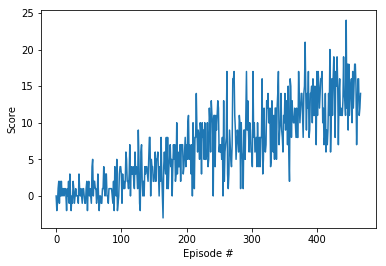

In [9]:
# initialize the agent
agent = Agent(state_size=37, action_size=4, seed=0, fc1_units=32, 
              fc2_units=32, fc3_units=32, dueling=False, double_network=True)

# train the agent
scores = dqn(checkpoint_path='dqn_double.pth')

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### Double Dueling DQN (Best Solution)

Episode 100	Average Score: 0.55
Episode 200	Average Score: 3.79
Episode 300	Average Score: 6.53
Episode 400	Average Score: 10.43
Episode 459	Average Score: 13.02
Environment solved in 359 episodes!	Average Score: 13.02


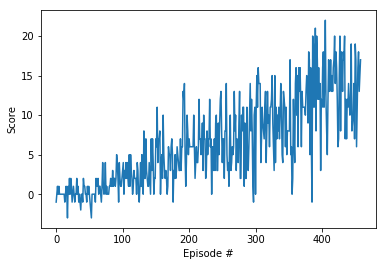

In [10]:
# initialize the agent
agent = Agent(state_size=37, action_size=4, seed=0, fc1_units=32, 
              fc2_units=32, fc3_units=32, dueling=True, double_network=True)

# train the agent
scores = dqn(checkpoint_path='dqn_double_dueling.pth')

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

When finished, you can close the environment.

In [11]:
env.close()

## Possible improvements

Researchers at Google DeepMind recently tested the performance of an agent that incorporated all six of the following extensions to the Deep Q-Networks (DQN) algorithm. The corresponding algorithm was termed Rainbow, and it outperforms each of the individual modifications and achieves state-of-the-art performance. Each of the six extensions address a different issue with the original DQN algorithm:

- Double DQN (DDQN)
- Prioritized experience replay
- Dueling DQN
- Learning from multi-step bootstrap targets
- Distributional DQN
- Noisy DQN

In this project, I've implemented 2/6 of these modifications but implementing the rest(completing the Rainbow algorithm) would most likely outperform the previous solution.

Another thing that would definitely improve our model performance is hyperparameter tuning. We could optimize our model architecture(number of layers, hidden units, etc) and hyperperameters like:

- BUFFER_SIZE - replay buffer size
- BATCH_SIZE - minibatch size
- GAMMA - discount factor
- TAU - for soft update of target parameters
- LR - learning rate 
- UPDATE_EVERY - how often to update the network
- n_episodes - maximum number of training episodes
- max_t - maximum number of timesteps per episode
- eps_start - starting value of epsilon, for epsilon-greedy action selection
- eps_end - minimum value of epsilon
- eps_decay - multiplicative factor (per episode) for decreasing epsilon